<h1>Titanic Disaster Survival Using Logistic Regression</h1>

In [338]:
#import libraries

In [426]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Load the Data**

In [340]:
#load data

In [427]:
titanic=pd.read_csv("F:/Skill Development- You Have No Access/Machine Learning/titanic_train.csv")

**View the data using head function which returns top  rows**

In [412]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [428]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Explaining Dataset**

survival : Survival 0 = No, 1 = Yes <br>
pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex : Sex <br>
Age : Age in years <br>
sibsp : Number of siblings / spouses aboard the Titanic 
<br>parch # of parents / children aboard the Titanic <br>
ticket : Ticket number fare Passenger fare cabin Cabin number <br>
embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton <br>




In [429]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [430]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [431]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [432]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1>Data Analysis

**Import Seaborn for visually analysing the data**

### Find out how many survived vs Died using countplot of seaboarn

In [348]:
#countplot of subrvived vs not  survived

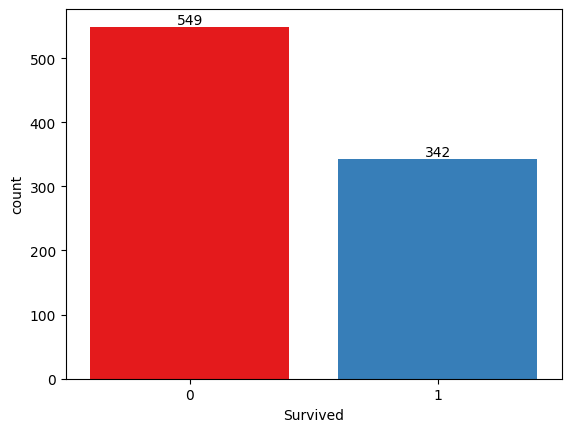

In [433]:
ax=sns.countplot(x='Survived', data=titanic, palette='Set1', saturation=1)
for bars in ax.containers:
    ax.bar_label(bars)

### Male vs Female Survival

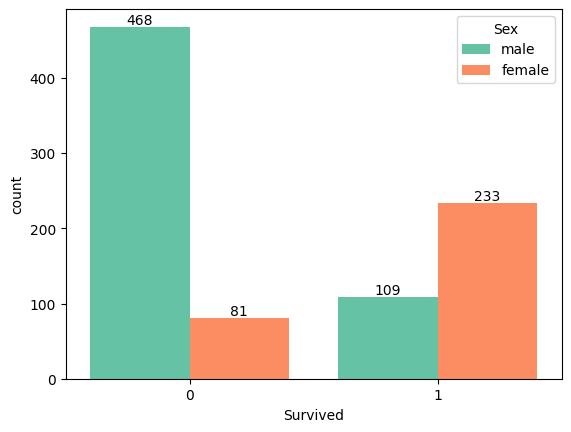

In [435]:
ax=sns.countplot(x='Survived', data=titanic, hue='Sex', palette='Set2', saturation=2)
for bars in ax.containers:
    ax.bar_label(bars)

**See age group of passengeres travelled **<br>
Note: We will use displot method to see the histogram. However some records does not have age hence the method will throw an error. In order to avoid that we will use dropna method to eliminate null values from graph

In [351]:
#Check for null

In [436]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [355]:
#Visualize null values

<Axes: >

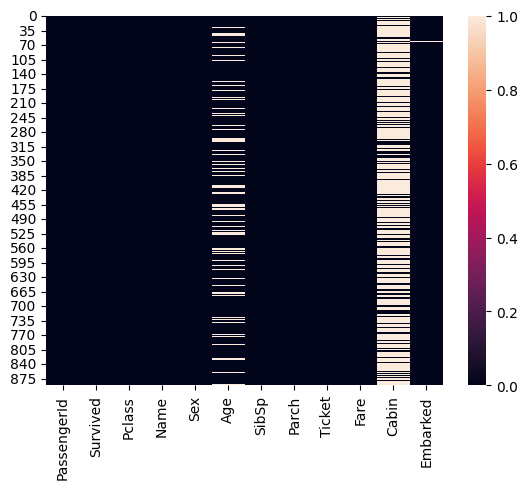

In [437]:
sns.heatmap(titanic.isna())

In [357]:
#find the % of null values in age column

In [438]:
(titanic['Age'].isna().sum()/len(titanic['Age']))*100

19.865319865319865

In [359]:
#find the % of null values in cabin column

In [439]:
(titanic['Cabin'].isna().sum()/len(titanic['Cabin']))*100

77.10437710437711

In [361]:
#find the distribution for the age column

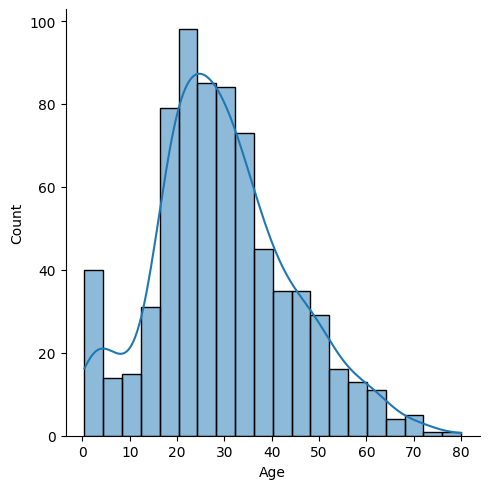

In [440]:
sns.displot(x='Age',data=titanic, kde= True)

<h1>Data Cleaning

**Fill the missing values**<br> we will fill the missing values for age. In order to fill missing values we use fillna method.<br> For now we will fill the missing age by taking average of all age 

In [363]:
#fill age column

In [464]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

**We can verify that no more null data exist** <br> we will examine data by isnull mehtod which will return nothing

In [365]:
#verify null value

In [465]:
titanic['Age'].isna().sum()

0

**Alternatively we will visualise the null value using heatmap**<br>
we will use heatmap method by passing only records which are null. 

In [367]:
#visualize null values

<Axes: >

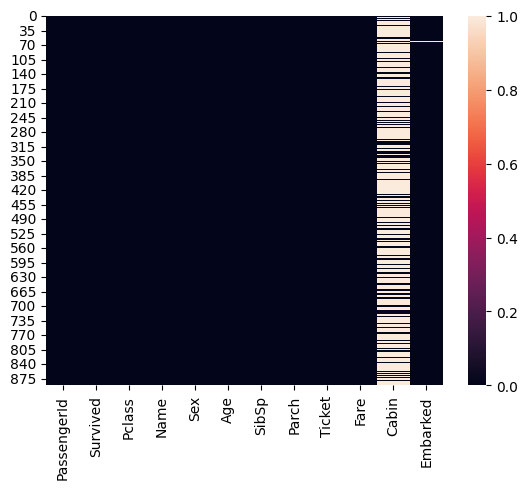

In [443]:
sns.heatmap(titanic.isna())

**We can see cabin column has a number of null values, as such we can not use it for prediction. Hence we will drop it**

In [369]:
#Drop cabin column

In [444]:
titanic.drop('Cabin',axis=1,inplace=True)

In [371]:
#see the contents of the data

In [445]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Preaparing Data for Model**<br>
No we will require to convert all non-numerical columns to numeric. Please note this is required for feeding data into model. Lets see which columns are non numeric info describe method

In [373]:
#Check for the non-numeric column

In [446]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [375]:
from ydata_profiling import ProfileReport
Profile=ProfileReport(titanic)
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### We can see, Name, Sex, Ticket and Embarked are non-numerical.It seems Name,Embarked and Ticket number are not useful for Machine Learning Prediction hence we will eventually drop it. For Now we would convert Sex Column to dummies numerical values

In [376]:
#convert sex column to numerical values

In [447]:
gender=pd.get_dummies(titanic['Sex'], drop_first= True).astype(int)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [466]:
titanic['Gender']=gender

In [449]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [380]:
#drop the columns which are not required

In [450]:
titanic.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [451]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [383]:
#Seperate Dependent and Independent variables

In [467]:
x=titanic[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic['Survived']

<h1>Data Modelling

### Building Model using Logestic Regression

In [468]:
from sklearn.model_selection import train_test_split

In [469]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [470]:
from sklearn.linear_model import LogisticRegression

In [471]:
lr=LogisticRegression()

In [472]:
lr.fit(x_train,y_train)

LogisticRegression()

In [473]:
predict=lr.predict(x_test)
predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [474]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

<h1>Testing

**See how our model is performing**

In [397]:
#print confusion matrix 

In [475]:
from sklearn.metrics import confusion_matrix

In [476]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,37,83


In [477]:
pd.DataFrame(confusion_matrix(y_test,predict))

,0,1
0,151,24
1,37,83


In [478]:
lr.score(x_test, y_test)

0.7932203389830509

In [479]:
from sklearn.metrics import classification_report

In [480]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



**Precision is fine considering Model Selected and Available Data. Accuracy can be increased by further using more features (which we dropped earlier) and/or  by using other model**

Note: <br>
Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations <br>
Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class
F1 score - F1 Score is the weighted average of Precision and Recall.

